# WDM vs LCDM modelling in CLASS

In [40]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

font = {'size'   : 20, 'family':'STIXGeneral'}
axislabelfontsize='x-large'
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
matplotlib.rc('font', **font)



## First manual attempts

In [41]:
DM_fraction = 0.25
general = {'H0':67, 'Omega_b':0.05, 'output':'tCl, mPk', 'P_k_max_1/Mpc':11}
WDM_settings = {'Omega_cdm':1e-6, 'N_ncdm':1, 'Omega_ncdm':DM_fraction,'m_ncdm':1000,'ncdm_fluid_approximation':3}

LCDM = Class()
LCDM.set(general)
LCDM.set({"Omega_cdm":DM_fraction})


WDM1 = Class()
WDM1.set(general)
WDM1.set(WDM_settings)

True

In [42]:
WDM1.compute()
LCDM.compute()

In [43]:
kvec = np.logspace(-5,1,100)
WDM1_pk =np.array([WDM1.pk(k,0) for k in kvec])
LCDM_pk =np.array([LCDM.pk(k,0) for k in kvec])

In [44]:
print(LCDM_pk)

[2.61184290e+02 2.98705488e+02 3.41616676e+02 3.90692031e+02
 4.46816888e+02 5.11003604e+02 5.84409809e+02 6.68359240e+02
 7.64365308e+02 8.74158251e+02 9.99715947e+02 1.14329906e+03
 1.30749086e+03 1.49524259e+03 1.70992470e+03 1.95538467e+03
 2.23601195e+03 2.55681053e+03 2.92347934e+03 3.34250050e+03
 3.82123495e+03 4.36802443e+03 4.99229782e+03 5.70467912e+03
 6.51709329e+03 7.44286536e+03 8.49680721e+03 9.69528505e+03
 1.10562558e+04 1.25992506e+04 1.43452676e+04 1.63165224e+04
 1.85360069e+04 2.10265846e+04 2.38108247e+04 2.69092066e+04
 3.03385791e+04 3.41101979e+04 3.82273415e+04 4.26825409e+04
 4.74542579e+04 5.25027713e+04 5.77655238e+04 6.31526869e+04
 6.85453478e+04 7.37904880e+04 7.86891016e+04 8.30030295e+04
 8.64559805e+04 8.87302087e+04 8.95000646e+04 8.84552394e+04
 8.53812224e+04 8.02376503e+04 7.32598442e+04 6.50561882e+04
 5.65642472e+04 4.88652763e+04 4.27973428e+04 3.84861803e+04
 3.49833524e+04 3.05824785e+04 2.45318698e+04 1.86642589e+04
 1.53151162e+04 1.344841

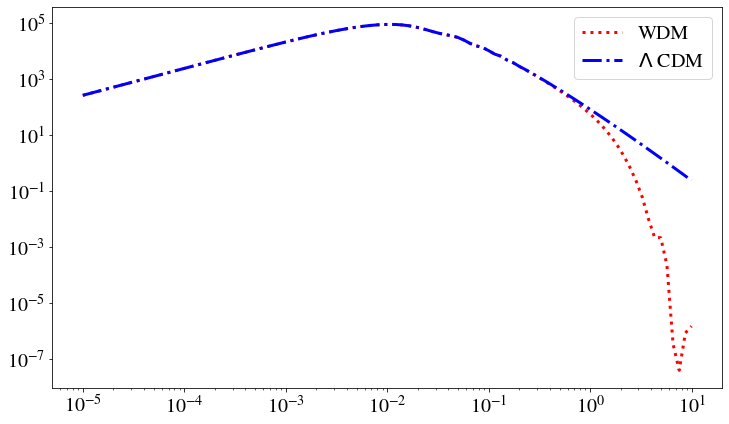

In [45]:
figure = plt.figure(figsize=(12,7))
plt.loglog(kvec, WDM1_pk, lw = 3, label=r"WDM", c="red", ls = ":")
plt.loglog(kvec, LCDM_pk, lw=3, label=r"$\Lambda$ CDM", c="blue", ls="-.")
plt.legend()

In [46]:
WDM2 = Class()
WDM2.set(general)
WDM2.set(WDM_settings)
WDM2.set({"m_ncdm":1e2})
WDM2.compute()

In [47]:
WDM3 = Class()
WDM3.set(general)
WDM3.set(WDM_settings)
WDM3.set({"m_ncdm":1e6})
WDM3.compute()

In [48]:
WDM2_pk = np.array([WDM2.pk(k,0.0) for k in kvec])
WDM3_pk = np.array([WDM3.pk(k,0.0) for k in kvec])


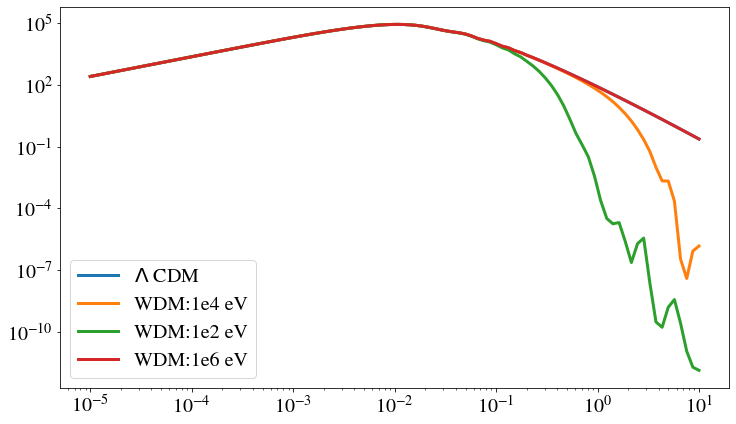

In [49]:
figure = plt.figure(figsize=(12,7))
models = [LCDM_pk, WDM1_pk, WDM2_pk, WDM3_pk]
labels = [r"$\Lambda$ CDM", "WDM:1e4 eV", "WDM:1e2 eV", "WDM:1e6 eV"]
for i, model in enumerate(models):
    plt.loglog(kvec, model, lw=3, label = labels[i])
plt.legend()

## Making T-variation automatically

In [50]:
#// temperatures to be tested, using a range of 10 .. 1e5 eV
Temps = [1e1,1e2,1e3,1e4,1e5]

#// Saving models 
WDMS = []  # container for models 
for T in Temps:
    WDM = Class()
    WDM.set(general)
    WDM.set(WDM_settings)
    WDM.set({"m_ncdm":T})
    WDM.set({"z_max_pk":200})
    WDM.compute()
    WDMS.append(WDM)

In [51]:
print(WDMS)

[<classy.Class object at 0x562b49954f50>, <classy.Class object at 0x562b6116c150>, <classy.Class object at 0x562b63e09dd0>, <classy.Class object at 0x562b66aad900>, <classy.Class object at 0x562b69814940>]


In [52]:
#// computing power spektra at Z=0

kvec = np.logspace(-5,1,1000) # k-vector 
pks = []   # container for p-arrays
for WDM in WDMS:
    pk = np.array([WDM.pk(k,0.0) for k in kvec])
    pks.append(pk)


Text(0, 0.5, '$P(k)\\,[\\mathrm{Mpc}^{3}]$')

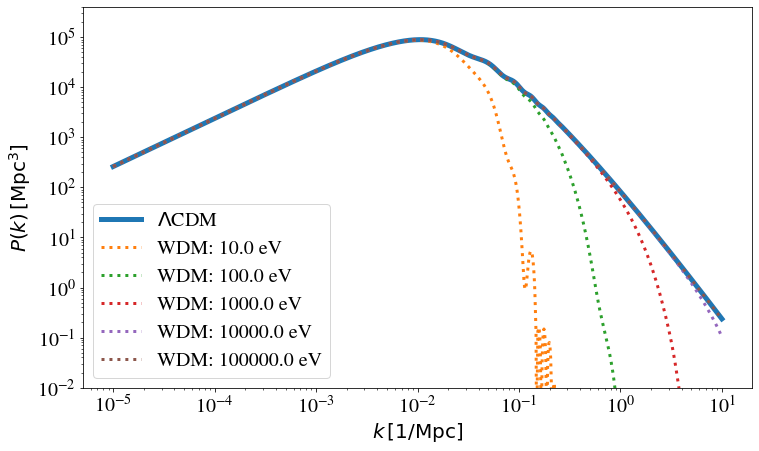

In [53]:
#// PLotting 
pfig = plt.figure(figsize=(12,7))
CDMpk = np.array([LCDM.pk(k,0.0) for k in kvec])
plt.loglog(kvec, CDMpk, lw=5, label=r"$\Lambda$CDM")
for i,pk in enumerate(pks):
    plt.loglog(kvec, pk, lw=3,ls=":", label=f"WDM: {Temps[i]} eV")
plt.legend()
plt.ylim(1e-2, 4e5)
plt.xlabel(r'$k\,[1/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k)\,[\mathrm{Mpc}^{3}]$')


In [54]:
#// making lC spectra
lCl = []   # contianer for l, Cl tuples
ders = []  # cointatiner for derived parameters 
for WDM in WDMS:
    cl = WDM.raw_cl()
    l = cl["ell"]
    _cll_ = cl["tt"]*l*(l+1)/(2*np.pi)
    lCl.append((l,_cll_))
    

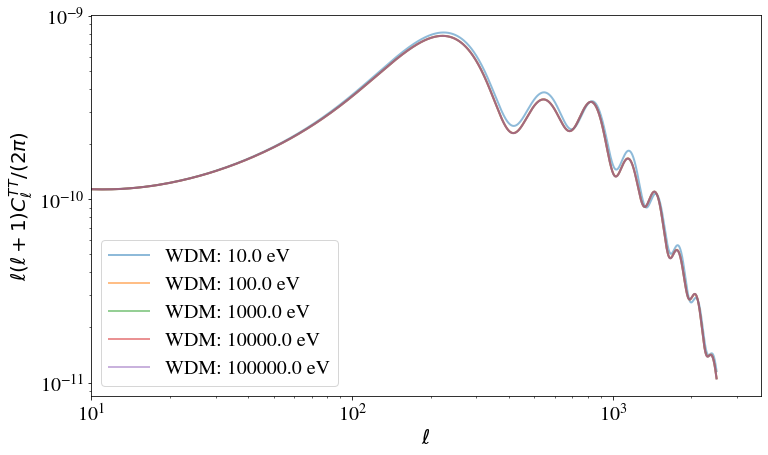

In [55]:
#// plotting
Cfig = plt.figure(figsize=(12,7))
for i in range(len(WDMS)):
    cosm = WDMS[i]
    cl = cosm.raw_cl()
    l = cl['ell']
    plt.loglog(l,cl['tt']*l*(l+1)/(2*np.pi),lw=2, alpha=0.5,label = f"WDM: {Temps[i]} eV")

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1) C_\ell^{TT} /(2\pi)$')
plt.xlim(1e1,)
plt.legend()

## Temperature variation at different redshifts Z

In [56]:
#// trying to find a redshift that works
Zm = Class()
Zm.set(general)
Zm.set(WDM_settings)
Zm.set({"z_max_pk":200})


Zm.compute()

In [57]:
#// computing power spektra at Z=0

kvec = np.logspace(-5,1,1000) # k-vector 
Z_pks = []   # container for p-arrays
for z in [0, 10, 50, 100]:
        pk = np.array([Zm.pk(k,z) for k in kvec])
        Z_pks.append(pk)

Text(0, 0.5, '$P(k)\\,[\\mathrm{Mpc}^{3}]$')

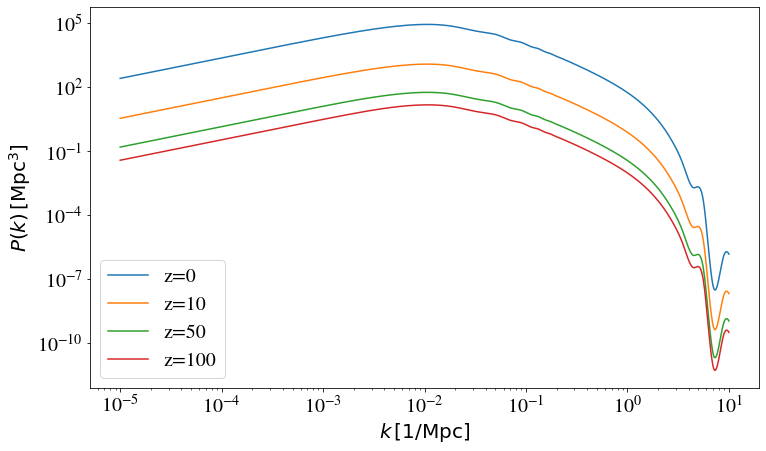

In [58]:
zfig = plt.figure(figsize=(12,7))
for i, ps in enumerate(Z_pks):
        plt.loglog(kvec,ps )
plt.legend(["z=0","z=10","z=50","z=100"])
plt.xlabel(r'$k\,[1/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k)\,[\mathrm{Mpc}^{3}]$')

In [59]:
#// computing power spektra at Z=/=0

kvec = np.logspace(-5,1,1000) # k-vector 
p0s= []
p10s =[]  
p50s = [] 
p100s=[]# container for p-arrays
for WDM in WDMS:
    pk0 = np.array([WDM.pk(k,0.0) for k in kvec])
    pk10 = np.array([WDM.pk(k,10) for k in kvec])
    pk50 = np.array([WDM.pk(k,50) for k in kvec])
    pk100 = np.array([WDM.pk(k,100) for k in kvec])
    
    p0s.append(pk0)
    p10s.append(pk10)
    p50s.append(pk50)
    p100s.append(pk100)

Text(0, 0.5, '$P(k)\\,[\\mathrm{Mpc}^{3}]$')

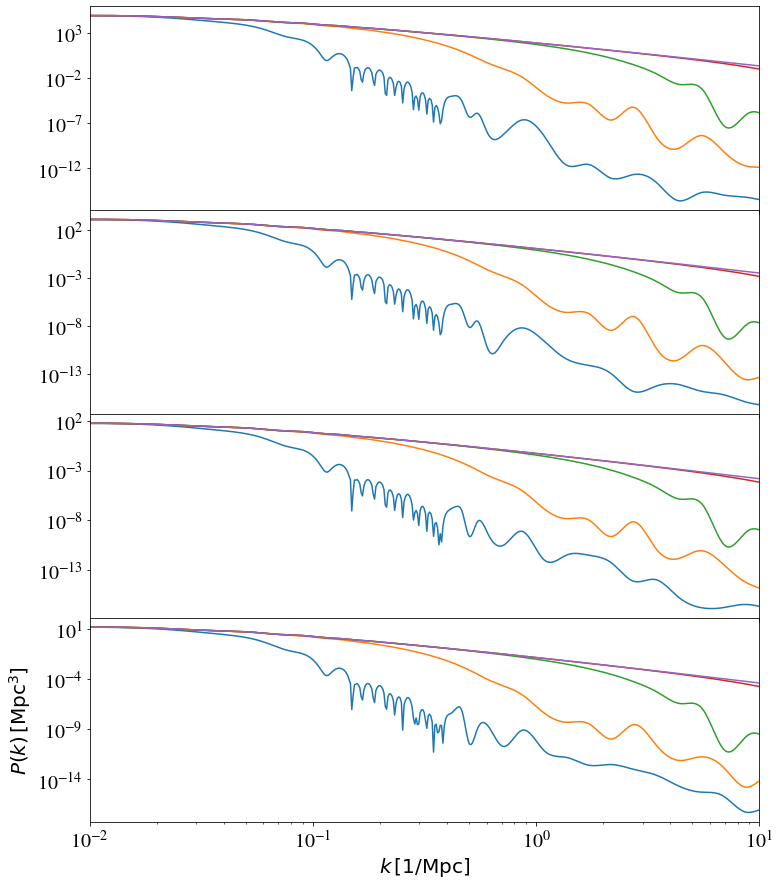

In [113]:
from matplotlib import gridspec
fig, ax= plt.subplots(nrows=4, ncols=1, sharex = True, figsize=(12,15))
plt.subplots_adjust(hspace=.0, wspace=.0)

for p in p0s:
    ax[0].loglog(kvec, p)
for p in p10s:
    ax[1].loglog(kvec, p)

for p in p50s:
    ax[2].loglog(kvec, p)
for p in p100s:
    ax[3].loglog(kvec, p)

plt.xlim(1e-2, 10)
plt.xlabel(r'$k\,[1/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k)\,[\mathrm{Mpc}^{3}]$')
